# California Housing Dataset

In [46]:
import sys
import pandas as pd
import numpy as np

import tensorflow as tf
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
sns.set_context("paper")

In [47]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

## Creating the model

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_train)

Epoch 1/15
363/363 [==============================] - 0s 799us/step - loss: 1.9567 - val_loss: 2.1918
Epoch 2/15
363/363 [==============================] - 0s 679us/step - loss: 0.8207 - val_loss: 0.7320
Epoch 3/15
363/363 [==============================] - 0s 721us/step - loss: 0.7153 - val_loss: 0.7008
Epoch 4/15
363/363 [==============================] - 0s 698us/step - loss: 0.6653 - val_loss: 0.6231
Epoch 5/15
363/363 [==============================] - 0s 676us/step - loss: 0.6231 - val_loss: 0.5874
Epoch 6/15
363/363 [==============================] - 0s 669us/step - loss: 0.5881 - val_loss: 0.5472
Epoch 7/15
363/363 [==============================] - 0s 685us/step - loss: 0.5602 - val_loss: 0.5273
Epoch 8/15
363/363 [==============================] - 0s 679us/step - loss: 0.5376 - val_loss: 0.5244
Epoch 9/15
363/363 [==============================] - 0s 678us/step - loss: 0.5170 - val_loss: 0.4739
Epoch 10/15
363/363 [==============================] - 0s 676us/step - loss: 0.500

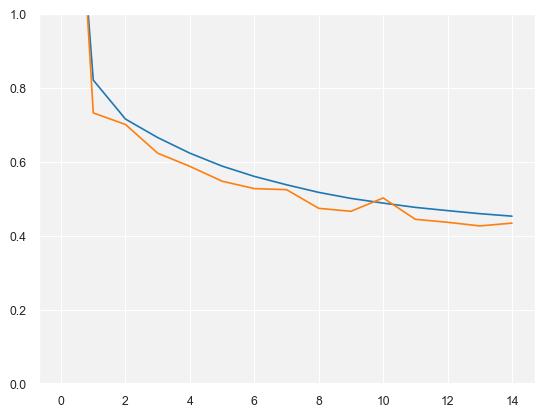

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
df_housing = pd.DataFrame(data=X_train, columns=housing.feature_names)

df_housing[housing.target_names[0]] = y_train
df_housing['prediction'] = y_pred

df_housing.sample(15)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction
7301,-0.732246,0.187918,-0.069758,-0.233325,-0.620830,0.159846,0.470151,-0.332663,0.66000,0.910731
10522,-0.706058,1.137216,-0.311060,0.145101,-0.176390,0.331490,-0.776004,0.641882,0.94500,1.645426
4870,-0.164753,0.583459,0.012019,-0.181131,-0.616267,-0.037747,-0.813482,0.731840,2.07400,2.023404
4221,0.458887,-0.049407,0.566057,-0.045807,0.071839,0.025073,-1.328809,1.201621,2.04000,2.463452
3546,-0.134689,0.820783,-0.108981,0.032768,-0.030373,-0.299849,0.990163,-1.442146,3.38000,2.478539
1626,0.602293,-1.077813,-0.074720,-0.283584,0.317331,-0.038771,-0.832221,0.736838,2.40800,2.462585
6398,4.251377,-0.998705,0.215958,0.247347,-1.083523,-0.579433,-0.790058,0.551924,5.00001,6.015415
8009,0.278295,-0.998705,0.251893,0.120532,-1.015990,-0.173494,1.046380,-0.412626,0.87500,1.429620
10054,1.258511,0.425242,0.342763,-0.210597,0.267138,-0.082143,0.910521,-1.412160,4.50000,3.565775
10576,0.538342,0.662567,-0.231052,-0.458386,-0.733081,-0.221723,-0.846276,0.641882,2.32400,2.925893
